The dataset that I have chosen is the fatal police shootings dataset which originates from The Washington Post's database. The collection of data for this particular dataset starts in 2015 and goes all the way up to 2024. There are 19 variables and 9497 observations. What I wanted to explore with this datset is what the correlation between race and number of fatalities is, as well as how that may change based on what weapon is involved in the fatality. I also intend to explore how age plays a role in fatal police shootings as well as gender.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
fps = pd.read_csv('fatal-police-shootings-data.csv')

In [42]:
fps.columns

Index(['id', 'date', 'threat_type', 'flee_status', 'armed_with', 'city',
       'county', 'state', 'latitude', 'longitude', 'location_precision',
       'name', 'age', 'gender', 'race', 'race_source',
       'was_mental_illness_related', 'body_camera', 'agency_ids'],
      dtype='object')

In [43]:
fps.head()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
0,3,2015-01-02,point,not,gun,Shelton,Mason,WA,47.246826,-123.121592,not_available,Tim Elliot,53.0,male,A,not_available,True,False,73
1,4,2015-01-02,point,not,gun,Aloha,Washington,OR,45.487421,-122.891696,not_available,Lewis Lee Lembke,47.0,male,W,not_available,False,False,70
2,5,2015-01-03,move,not,unarmed,Wichita,Sedgwick,KS,37.694766,-97.280554,not_available,John Paul Quintero,23.0,male,H,not_available,False,False,238
3,8,2015-01-04,point,not,replica,San Francisco,San Francisco,CA,37.762910,-122.422001,not_available,Matthew Hoffman,32.0,male,W,not_available,True,False,196
4,9,2015-01-04,point,not,other,Evans,Weld,CO,40.383937,-104.692261,not_available,Michael Rodriguez,39.0,male,H,not_available,False,False,473


In [44]:
fps.tail()

,id,date,threat_type,flee_status,armed_with,city,county,state,latitude,longitude,location_precision,name,age,gender,race,race_source,was_mental_illness_related,body_camera,agency_ids
9492,10268,2024-03-25,point,NaN,gun,Waterloo,Black Hawk,IA,42.499199,-92.380785,address,John Piazza,41.0,male,NaN,NaN,False,False,3270
9493,10269,2024-03-25,undetermined,NaN,knife,Tuscaloosa,Tuscaloosa,AL,33.163538,-87.509322,address,Evet Michelle Tower,45.0,female,NaN,NaN,True,True,734
9494,10270,2024-03-25,threat,not,knife,Reading,Berks,PA,40.348801,-75.929334,block,Damon Stern,50.0,male,NaN,NaN,False,False,1676
9495,10271,2024-03-26,threat,NaN,gun,Haysville,Sedgwick,KS,37.566607,-97.351571,block,Bill Osterhout,68.0,male,NaN,NaN,True,True,12920
9496,10272,2024-03-26,shoot,not,gun,Clio,Genesee,MI,43.182366,-83.734337,block,NaN,NaN,male,NaN,NaN,False,False,7908


In [45]:
fps.isnull().sum()

,0
id,0
date,0
threat_type,67
flee_status,1298
armed_with,212
city,70
county,4722
state,0
latitude,1051
longitude,1051


In [46]:
race_mapping = {
    'W': 'White',
    'B': 'Black',
    'H': 'Hispanic',
    'A': 'Asian',
    'N': 'Native American',
    'P': 'Other',
    'O': 'Other',
    'U': 'Unknown'
}

fps['race'] = fps['race'].map(race_mapping).fillna('Unknown')

In [47]:
print(fps['race'].unique())

['Asian' 'White' 'Hispanic' 'Black' 'Other' 'Unknown' 'Native American']


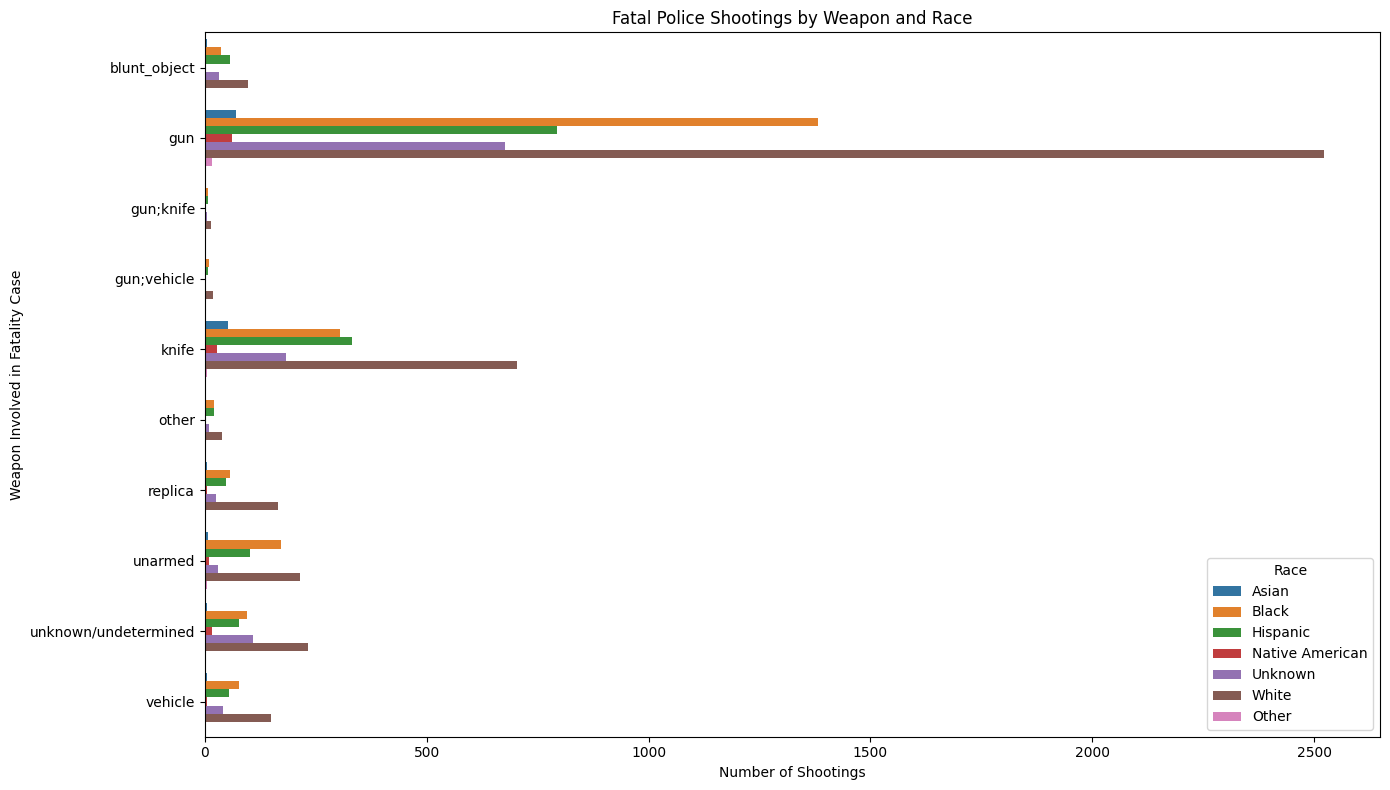

In [54]:

fps['armed_with'] = fps['armed_with'].replace({
    'unknown': 'unknown/undetermined',
    'undetermined': 'unknown/undetermined'
})

fps = fps.dropna(subset=['armed_with'])

grouped = fps.groupby(['armed_with', 'race']).size().reset_index(name='count')

top_armed = fps['armed_with'].value_counts().head(10).index
grouped = grouped[grouped['armed_with'].isin(top_armed)]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))
sns.barplot(
    data=grouped,
    y='armed_with',
    x='count',
    hue='race'
)
plt.title('Fatal Police Shootings by Weapon and Race')
plt.xlabel('Number of Shootings')
plt.ylabel('Weapon Involved in Fatality Case')
plt.legend(title='Race')
plt.tight_layout()
plt.show()

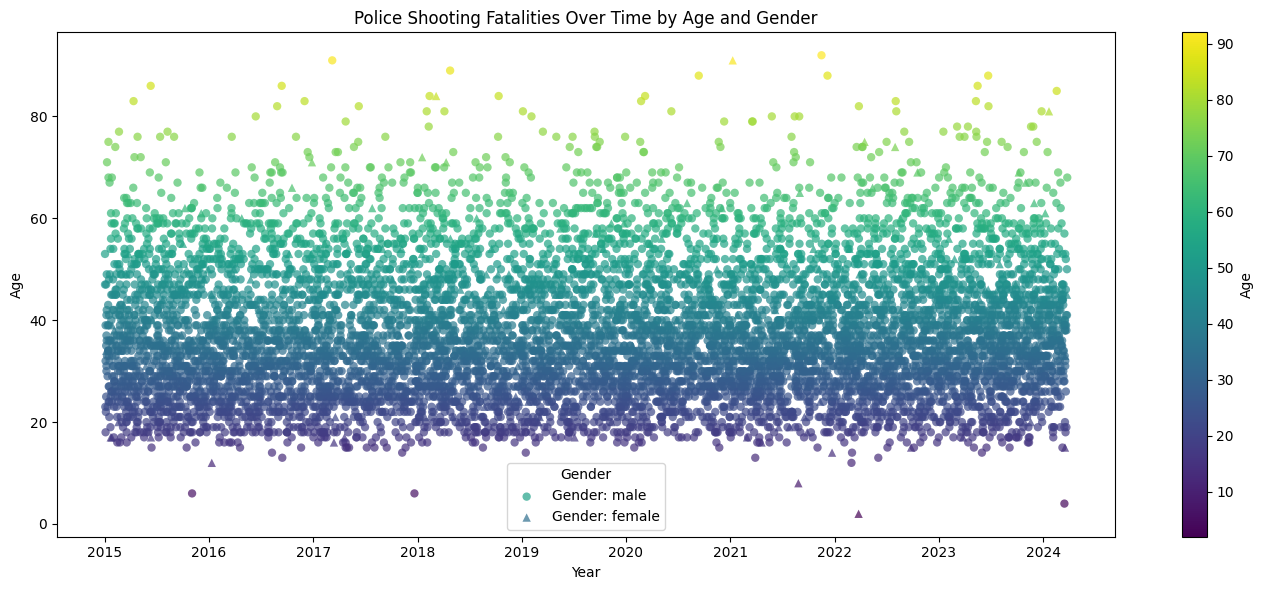

In [55]:

fps['date'] = pd.to_datetime(fps['date'])
fps_gender = fps.dropna(subset=['age', 'gender'])
fps_gender = fps_gender.sort_values(by='date')

cmap = plt.cm.viridis

norm = plt.Normalize(fps_gender['age'].min(), fps_gender['age'].max())

gender_markers = {
    'male': 'o',
    'female': '^'
}

fig, ax = plt.subplots(figsize=(14,6))

for gender, marker in gender_markers.items():
    subset = fps_gender[fps_gender['gender'] == gender]
    scatter = ax.scatter(
        subset['date'],
        subset['age'],
        c=subset['age'],
        cmap=cmap,
        norm=norm,
        alpha=0.7,
        marker=marker,
        label=f'Gender: {gender}',
        edgecolors='none'
    )

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='Age')
ax.set_title('Police Shooting Fatalities Over Time by Age and Gender')
ax.set_xlabel('Year')
ax.set_ylabel('Age')
ax.legend(title='Gender')
plt.tight_layout()
plt.show()

In [40]:
from scipy.stats import norm

In [50]:
age_data = fps['age'].dropna()

Original Median Age: 35.00
95% Confidence Interval for the Median: [35.00, 36.00]


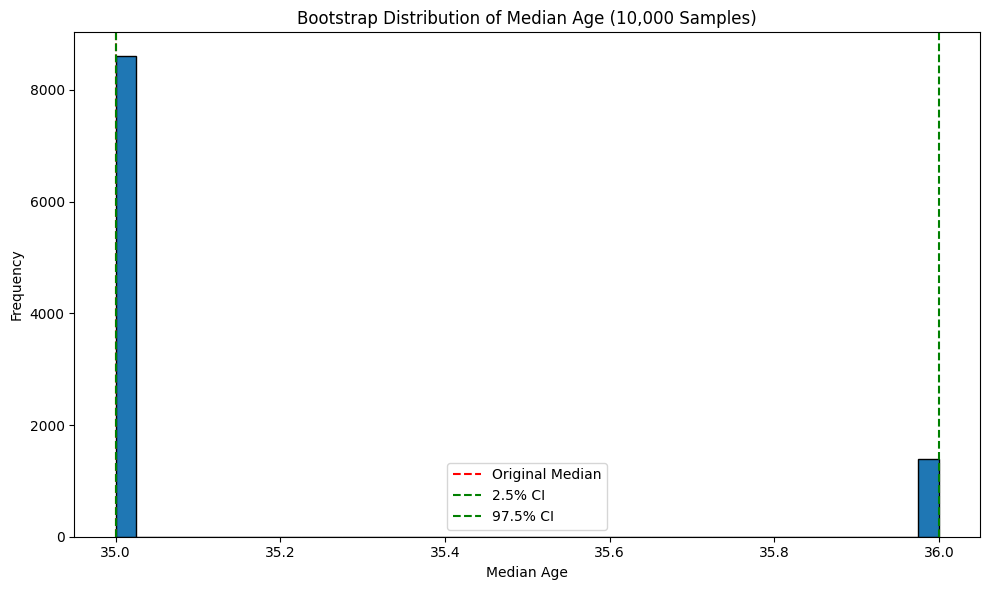

In [53]:
n_iterations = 10000
n_size = len(age_data)
medians = []
for _ in range(n_iterations):
    sample = np.random.choice(age_data, size=n_size, replace=True)
    medians.append(np.median(sample))

medians = np.array(medians)

lower_bound = np.percentile(medians, 2.5)
upper_bound = np.percentile(medians, 97.5)
original_median = np.median(age_data)

print(f"Original Median Age: {original_median:.2f}")
print(f"95% Confidence Interval for the Median: [{lower_bound:.2f}, {upper_bound:.2f}]")

plt.figure(figsize=(10,6))
plt.hist(medians, bins=40, edgecolor='black')
plt.axvline(original_median, color='red', linestyle='--', label='Original Median')
plt.axvline(lower_bound, color='green', linestyle='--', label='2.5% CI')
plt.axvline(upper_bound, color='green', linestyle='--', label='97.5% CI')
plt.title('Bootstrap Distribution of Median Age (10,000 Samples)')
plt.xlabel('Median Age')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()